# Branded Cars Analysis

In [69]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()


In [70]:
data=pd.read_csv("C:\\Users\\anish\\Downloads\\DataScienceFiles\\Linear Regression Practical\\brandedcarexample.csv")
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [71]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [72]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [73]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [74]:
Data=data.drop(["Model"],axis=1)
Data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [75]:
Data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [76]:
Data=Data.dropna()
Data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [77]:
Data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


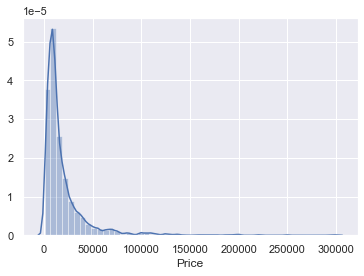

In [78]:
sns.distplot(Data["Price"])

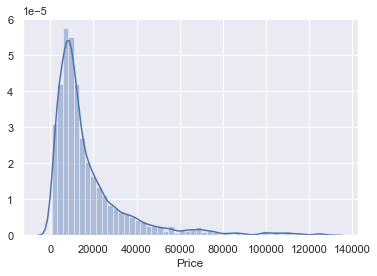

In [79]:
#here graph shows the exponential increase in the Price, which is due to the outlayers
#To remove the outlayers, here we are removing remocing 1% of data.

q=Data["Price"].quantile(0.99)
Data1=Data[Data["Price"]<q]
sns.distplot(Data1["Price"])

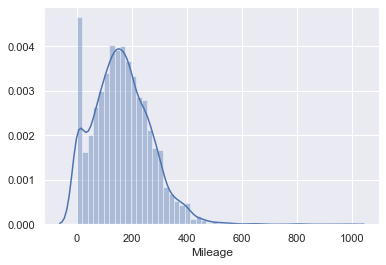

In [80]:
sns.distplot(Data["Mileage"])


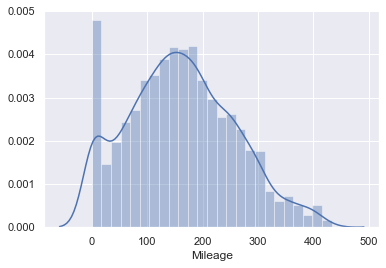

In [81]:
q=Data["Mileage"].quantile(0.99)
Data2=Data1[Data1["Mileage"]<q]
sns.distplot(Data2["Mileage"])

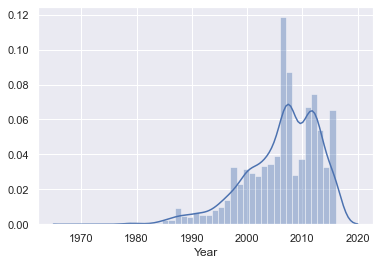

In [82]:
sns.distplot(Data["Year"])

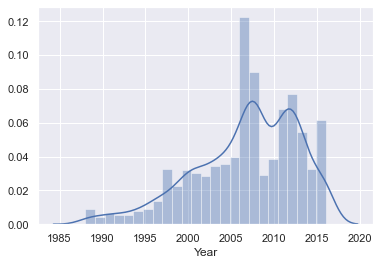

In [83]:
q=Data2["Year"].quantile(0.01)
Data3=Data2[Data2["Year"]>q]
sns.distplot(Data3["Year"])

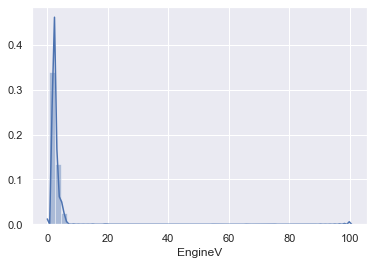

In [84]:
sns.distplot(Data["EngineV"])

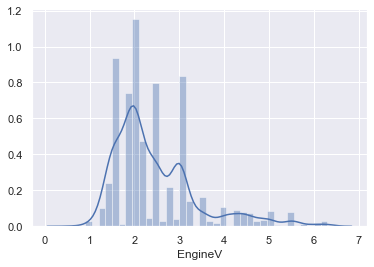

In [85]:
Data4=Data3[Data3["EngineV"]<6.5]
sns.distplot(Data4["EngineV"])

In [86]:
Data4.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866,3866.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1466,NaN,NaN,1807,3504,NaN
mean,NaN,18197.480629,NaN,160.471547,2.450246,NaN,NaN,2006.713140
std,NaN,19087.396949,NaN,95.543697,0.949413,NaN,NaN,6.101235
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


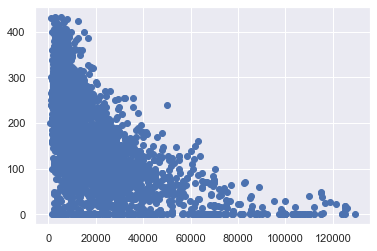

In [87]:
plt.scatter(Data4["Price"],Data4["Mileage"])


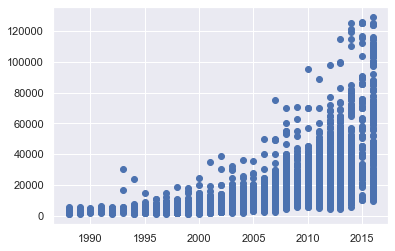

In [88]:
plt.scatter(Data4["Year"],Data4["Price"])


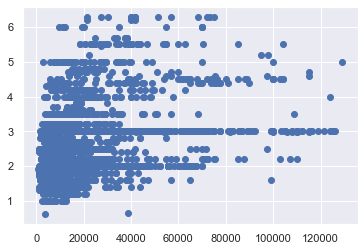

In [89]:
plt.scatter(Data4["Price"],Data4["EngineV"])


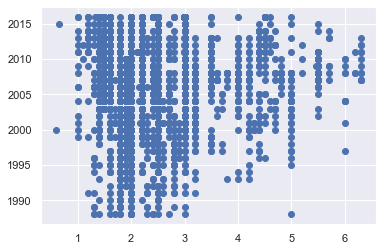

In [90]:
plt.scatter(Data4["EngineV"],Data4["Year"])


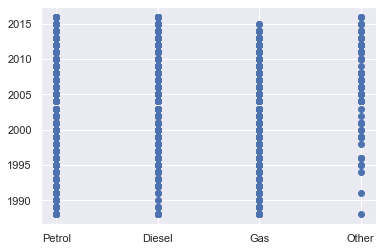

In [91]:
plt.scatter(Data4["Engine Type"],Data4["Year"])

In [92]:
#Cleaning the data
dataclean=Data4.reset_index(drop=True)


In [93]:
dataclean.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866,3866.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1466,NaN,NaN,1807,3504,NaN
mean,NaN,18197.480629,NaN,160.471547,2.450246,NaN,NaN,2006.713140
std,NaN,19087.396949,NaN,95.543697,0.949413,NaN,NaN,6.101235
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [94]:
#price is increased exponentially, so take the log of the price
log_price=np.log(dataclean["Price"])

In [95]:
dataclean["log price"]=log_price
dataclean.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


In [96]:
newdata=dataclean.drop(["Price"],axis=1)
newdata.describe(include="all")

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log price
count,3866,3866,3866.000000,3866.000000,3866,3866,3866.000000,3866.000000
unique,7,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,1466,NaN,NaN,1807,3504,NaN,NaN
mean,NaN,NaN,160.471547,2.450246,NaN,NaN,2006.713140,9.415868
std,NaN,NaN,95.543697,0.949413,NaN,NaN,6.101235,0.876669
min,NaN,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,NaN,91.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,NaN,157.000000,2.200000,NaN,NaN,2008.000000,9.367344
75%,NaN,NaN,225.000000,3.000000,NaN,NaN,2012.000000,9.985068


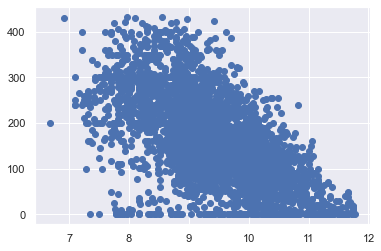

In [97]:
plt.scatter(newdata["log price"],newdata["Mileage"])

# Let's see about Multicollinearity

In [98]:
variables=newdata[["EngineV","Mileage","Year"]]


In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [100]:
vif

,VIF,Features
0,7.660317,EngineV
1,3.794319,Mileage
2,10.360888,Year


In [101]:
#year has got high collinearity, which could affect for the regression process, so remove the column "Year"
newdata=newdata.drop(["Year"],axis=1)
# Now, the newdata has got no multicollinearities

In [102]:
newdata.describe(include="all") 

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log price
count,3866,3866,3866.000000,3866.000000,3866,3866,3866.000000
unique,7,6,NaN,NaN,4,2,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,1466,NaN,NaN,1807,3504,NaN
mean,NaN,NaN,160.471547,2.450246,NaN,NaN,9.415868
std,NaN,NaN,95.543697,0.949413,NaN,NaN,0.876669
min,NaN,NaN,0.000000,0.600000,NaN,NaN,6.684612
25%,NaN,NaN,91.000000,1.800000,NaN,NaN,8.881836
50%,NaN,NaN,157.000000,2.200000,NaN,NaN,9.367344
75%,NaN,NaN,225.000000,3.000000,NaN,NaN,9.985068


In [103]:
dummies_data= pd.get_dummies(newdata, drop_first=True)
dummies_data

,Mileage,EngineV,log price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3862,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3863,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3864,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [104]:
dummies_data.columns.values

array(['Mileage', 'EngineV', 'log price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [105]:
cols=['log price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [106]:
Newdata=dummies_data[cols]
Newdata.head()

,log price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# REGRESSION

In [114]:
#TO SCALE THE DATA
input=Newdata.drop(['log price'],axis=1)
output=Newdata["log price"]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(input)
scaledinput=scaler.transform(input)

TEST TRAIN SPLIT

In [115]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaledinput, output, test_size=0.2, random_state=365)

CREATING THE REGRESSION MODEL

In [117]:
reg=LinearRegression()


In [119]:
reg.fit(x_train,y_train)

LinearRegression()

In [121]:
ypred=reg.predict(x_train)

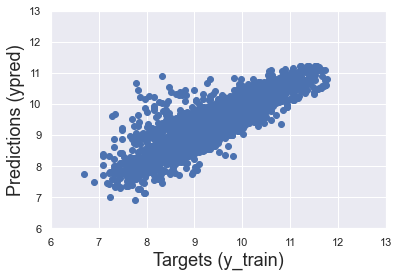

In [124]:
#PLOTTING OUTPUT AND PREDICTED OUTPUT
plt.scatter(y_train, ypred)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (ypred)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

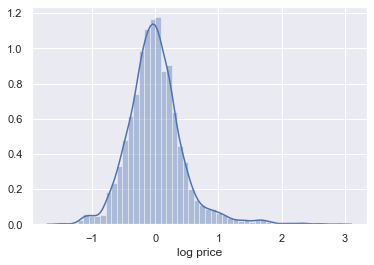

In [126]:
sns.distplot(ypred-y_train)

In [127]:
reg.score(x_train,y_train)

0.7415645182486198

In [129]:
reg.coef_

array([-0.44838367,  0.21092609,  0.01217236,  0.01091936, -0.13381235,
       -0.18243069, -0.05551416, -0.08742151, -0.15127967, -0.10115164,
       -0.19711525, -0.1281566 , -0.16265036, -0.12418232, -0.03326347,
       -0.14940858,  0.31944559])

In [130]:
reg.intercept_

9.413280072375791

In [136]:
summary_df=pd.DataFrame(input.columns.values, columns=["Features"])


In [138]:

summary_df["Weights"]=reg.coef_

In [140]:
summary_df

,Features,Weights
0,Mileage,-0.448384
1,EngineV,0.210926
2,Brand_BMW,0.012172
3,Brand_Mercedes-Benz,0.010919
4,Brand_Mitsubishi,-0.133812
5,Brand_Renault,-0.182431
6,Brand_Toyota,-0.055514
7,Brand_Volkswagen,-0.087422
8,Body_hatch,-0.151280
9,Body_other,-0.101152


# TESTING DATA REGRESSION MODEL

In [141]:
ypred1 = reg.predict(x_test)

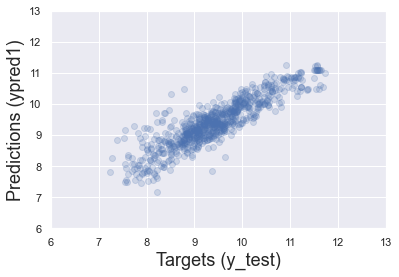

In [144]:
plt.scatter(y_test, ypred1, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (ypred1)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [149]:
ypred1


In [152]:
actualpred=np.exp(ypred1)
actualpred

array([10650.43870916,  8041.55568267,  6799.06994473,  7606.97768936,
       11309.79975862, 21221.25221909, 19979.06176838, 14980.77611275,
        8392.77011412, 33073.22356794,  7161.09694046, 30002.10182403,
        5514.51048752, 12807.6730998 ,  8380.96597974, 10208.71760631,
       24205.5325639 , 11779.00054576, 37473.7775483 , 16154.25295482,
        7958.11556578, 12440.64195038,  6069.53678173, 13300.25599081,
       23778.45890097,  5820.19524691,  2188.21571053,  2556.97373074,
       36368.34560057,  9218.77502597, 15389.972681  , 11834.39197015,
        6098.04355696, 22564.84593168, 11986.41658512, 11340.52323969,
       10584.83260026, 26581.08814856,  9783.96734401, 16717.530899  ,
       19052.69982223, 10469.92541879, 23213.51876216, 22022.44643438,
        7161.09694046, 16888.82625537, 32150.8893226 , 26964.83174765,
       77447.77156149,  5070.37657654,  2502.40571625,  2509.7548508 ,
       10805.83599495, 20156.27863644, 52382.84397547, 12866.50876147,
      

In [153]:
y_test

1192     7.740664
2752     9.487972
3752     8.999619
3256     8.764053
892      9.121509
          ...    
2044    10.292146
2957     8.575462
3133     9.814656
1369    11.134589
2594     9.287301
Name: log price, Length: 774, dtype: float64

In [154]:
actualytest=np.exp(y_test)
actualytest

1192     2300.0
2752    13200.0
3752     8100.0
3256     6400.0
892      9150.0
         ...   
2044    29500.0
2957     5300.0
3133    18300.0
1369    68500.0
2594    10800.0
Name: log price, Length: 774, dtype: float64

In [156]:
overall_summary_df= pd.DataFrame(actualpred,columns=["Prediction"])
overall_summary_df

,Prediction
0,10650.438709
1,8041.555683
2,6799.069945
3,7606.977689
4,11309.799759
...,...
769,14874.949923
770,5735.556226
771,13623.775492
772,28096.133846


In [157]:
overall_summary_df["Targets"]= actualytest
overall_summary_df.head()

,Prediction,Targets
0,10650.438709,NaN
1,8041.555683,7900.0
2,6799.069945,NaN
3,7606.977689,NaN
4,11309.799759,NaN


In [159]:
actualytest=actualytest.reset_index(drop=True)
actualytest.head()

0     2300.0
1    13200.0
2     8100.0
3     6400.0
4     9150.0
Name: log price, dtype: float64

In [160]:
overall_summary_df["Targets"]= actualytest
overall_summary_df

,Prediction,Targets
0,10650.438709,2300.0
1,8041.555683,13200.0
2,6799.069945,8100.0
3,7606.977689,6400.0
4,11309.799759,9150.0
...,...,...
769,14874.949923,29500.0
770,5735.556226,5300.0
771,13623.775492,18300.0
772,28096.133846,68500.0


In [162]:
overall_summary_df["Residual"]=overall_summary_df["Targets"]-overall_summary_df["Prediction"]
overall_summary_df

,Prediction,Targets,Residual
0,10650.438709,2300.0,-8350.438709
1,8041.555683,13200.0,5158.444317
2,6799.069945,8100.0,1300.930055
3,7606.977689,6400.0,-1206.977689
4,11309.799759,9150.0,-2159.799759
...,...,...,...
769,14874.949923,29500.0,14625.050077
770,5735.556226,5300.0,-435.556226
771,13623.775492,18300.0,4676.224508
772,28096.133846,68500.0,40403.866154


In [164]:
overall_summary_df["% Diff"]= np.absolute(overall_summary_df["Residual"]/overall_summary_df["Targets"]*100)
overall_summary_df

,Prediction,Targets,Residual,% Diff
0,10650.438709,2300.0,-8350.438709,363.062553
1,8041.555683,13200.0,5158.444317,39.079124
2,6799.069945,8100.0,1300.930055,16.060865
3,7606.977689,6400.0,-1206.977689,18.859026
4,11309.799759,9150.0,-2159.799759,23.604369
...,...,...,...,...
769,14874.949923,29500.0,14625.050077,49.576441
770,5735.556226,5300.0,-435.556226,8.218042
771,13623.775492,18300.0,4676.224508,25.553139
772,28096.133846,68500.0,40403.866154,58.983746


In [165]:
overall_summary_df.describe(include="all")

,Prediction,Targets,Residual,% Diff
count,774.000000,774.000000,774.000000,774.000000
mean,16170.746881,18612.010504,2441.263622,33.814041
std,13742.956902,20953.006281,10835.145339,48.272151
min,1284.843010,1400.000000,-29171.365746,0.056793
25%,7489.039002,6999.250000,-2013.351405,11.277214
50%,11561.730997,11500.000000,150.474574,23.239276
75%,19726.158072,20500.000000,3293.698161,39.023878
max,77447.771561,124000.000000,80642.598057,507.418465
